<a href="https://colab.research.google.com/github/pedrotamani/Analisis-de-Ventas-AluraStore/blob/main/Analisis_de_Venta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


El conjunto de datos incluye la siguiente información:

- Producto y Categoría: Artículos vendidos y sus calificaciones.

- Precio y Envío: Valores de venta y costos asociados.

- Fecha y ubicación de compra: Información temporal y geográfica.

- Evaluación de compra: Comentarios de clientes.

- Tipo de Pago y Cuotas: Métodos utilizados por los clientes.

- Coordenadas Geográficas: Ubicación de las transacciones.

#1. Análisis de facturación



In [3]:
ingresos_por_tienda = tienda.groupby('Lugar de Compra')['Precio'].sum().reset_index()

In [9]:
ingresos_por_tienda.columns = ['Lugar de Compra', 'Ingreso Total']

In [10]:
ingresos_por_tienda

,Lugar de Compra,Ingreso Total
0,Armenia,4615700.0
1,Barranquilla,32907700.0
2,Bogotá,440005000.0
3,Bucaramanga,17579200.0
4,Cali,154493700.0
5,Cartagena,22296700.0
6,Cúcuta,37879500.0
7,Inírida,2722500.0
8,Leticia,14669800.0
9,Manizales,8027600.0


# 2. Ventas por categoría

In [11]:
ventas_por_categoria = tienda.groupby(['Lugar de Compra', 'Categoría del Producto']).size().reset_index(name='Cantidad de Productos Vendidos')

In [7]:
ventas_por_categoria

,Lugar de Compra,Categoría del Producto,Cantidad de Productos Vendidos
0,Armenia,Artículos para el hogar,1
1,Armenia,Deportes y diversión,1
2,Armenia,Electrodomésticos,2
3,Armenia,Electrónicos,2
4,Armenia,Juguetes,3
...,...,...,...
117,Valledupar,Muebles,2
118,Villavicencio,Electrodomésticos,3
119,Villavicencio,Electrónicos,2
120,Villavicencio,Juguetes,2


# 3. Calificación promedio de la tienda


In [18]:
# Calcular calificación promedio por tienda
calificacion_promedio = tienda.groupby('Lugar de Compra')['Calificación'].mean().reset_index()

In [21]:
# Eliminar columna original si no se necesita
calificacion_promedio = calificacion_promedio.drop(columns=['Calificación'])

In [22]:
calificacion_promedio

,Lugar de Compra,Calificación Promedio
0,Armenia,3.36
1,Barranquilla,3.57
2,Bogotá,4.09
3,Bucaramanga,4.39
4,Cali,3.99
5,Cartagena,4.04
6,Cúcuta,3.88
7,Inírida,4.00
8,Leticia,4.16
9,Manizales,3.80


# 4. Productos más y menos vendidos

In [29]:
# Contar ventas por producto y tienda
ventas_por_producto = tienda.groupby(['Lugar de Compra', 'Producto']).size().reset_index(name='Cantidad Vendida')

# Ordenar para visualizar
ventas_ordenadas = ventas_por_producto.sort_values(['Lugar de Compra', 'Cantidad Vendida'], ascending=[True, False])

ventas_ordenadas

,Lugar de Compra,Producto,Cantidad Vendida
9,Armenia,Silla de oficina,2
0,Armenia,Bloques de construcción,1
1,Armenia,Carrito de control remoto,1
2,Armenia,Cubertería,1
3,Armenia,Cubo mágico 8x8,1
...,...,...,...
472,Villavicencio,Bloques de construcción,1
474,Villavicencio,Cubo mágico 8x8,1
475,Villavicencio,Impresora,1
477,Villavicencio,Refrigerador,1


In [45]:
# Producto más vendido por tienda
mas_vendidos = ventas_ordenadas.groupby('Lugar de Compra').head(1)

# Producto menos vendido por tienda (por si hay más de uno)
menos_vendidos = ventas_ordenadas.groupby('Lugar de Compra').tail(1)

print("Más vendidos:\n", mas_vendidos)
print("\nMenos vendidos:\n", menos_vendidos)

Más vendidos:
     Lugar de Compra                   Producto  Cantidad Vendida
9           Armenia           Silla de oficina                 2
24     Barranquilla                 Cubertería                 4
103          Bogotá               Vaso térmico                30
106     Bucaramanga        Balón de baloncesto                 3
168            Cali               Refrigerador                10
210       Cartagena           Silla de oficina                 4
228          Cúcuta                  Iphone 15                 4
244         Inírida  Auriculares con micrófono                 1
258         Leticia                     Estufa                 4
284       Manizales                   Smart TV                 2
289        Medellín                Auriculares                19
337           Neiva                    Armario                 1
353           Pasto           Lavadora de ropa                 3
363         Pereira                    Armario                 7
421       

In [49]:
# Agrupar por producto y contar las ventas
ventas_totales = tienda.groupby('Producto').size().reset_index(name='Cantidad Vendida')

In [57]:
# Obtener los top 5 más vendidos
top_3 = ventas_totales.sort_values('Cantidad Vendida', ascending=False).head(3)

# Obtener los 5 menos vendidos
menos_3 = ventas_totales.sort_values('Cantidad Vendida', ascending=True).head(3)

In [58]:
# Unir ambos DataFrames
productos_destacados = pd.concat([top_3, menos_3])

/tmp/ipython-input-59-4010700093.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=productos_destacados, x='Cantidad Vendida', y='Producto', palette='viridis')


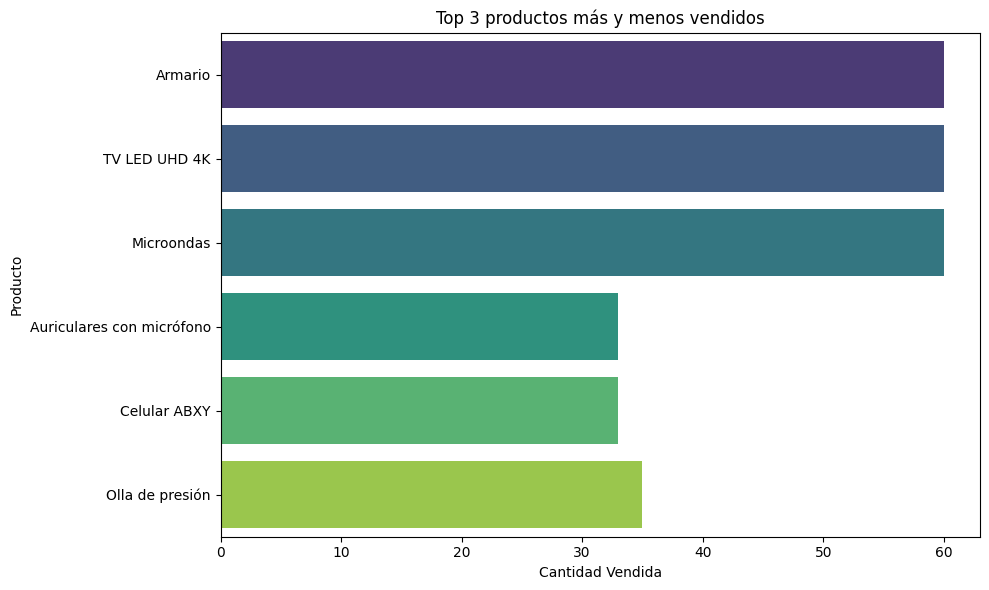

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10,6))
sns.barplot(data=productos_destacados, x='Cantidad Vendida', y='Producto', palette='viridis')

plt.title('Top 3 productos más y menos vendidos')
plt.xlabel('Cantidad Vendida')
plt.ylabel('Producto')
plt.tight_layout()
plt.show()

# 5. Envío promedio por tienda

In [60]:
# Calcular costo de envío promedio por tienda
costo_envio_promedio = tienda.groupby('Lugar de Compra')['Costo de envío'].mean().reset_index()

# Redondear a 2 decimales para mejor presentación
costo_envio_promedio['Costo de Envío Promedio'] = costo_envio_promedio['Costo de envío'].round(2)

# Eliminar columna original si no se necesita
costo_envio_promedio = costo_envio_promedio.drop(columns=['Costo de envío'])

In [61]:
costo_envio_promedio

,Lugar de Compra,Costo de Envío Promedio
0,Armenia,17314.29
1,Barranquilla,23708.00
2,Bogotá,23815.85
3,Bucaramanga,30587.10
4,Cali,28827.56
5,Cartagena,22624.53
6,Cúcuta,40129.41
7,Inírida,28460.00
8,Leticia,24450.00
9,Manizales,29140.00


6. Gráficos

/tmp/ipython-input-69-2116464643.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=resumen_tienda, y='Lugar de Compra', x='Ingreso Total', palette='viridis')


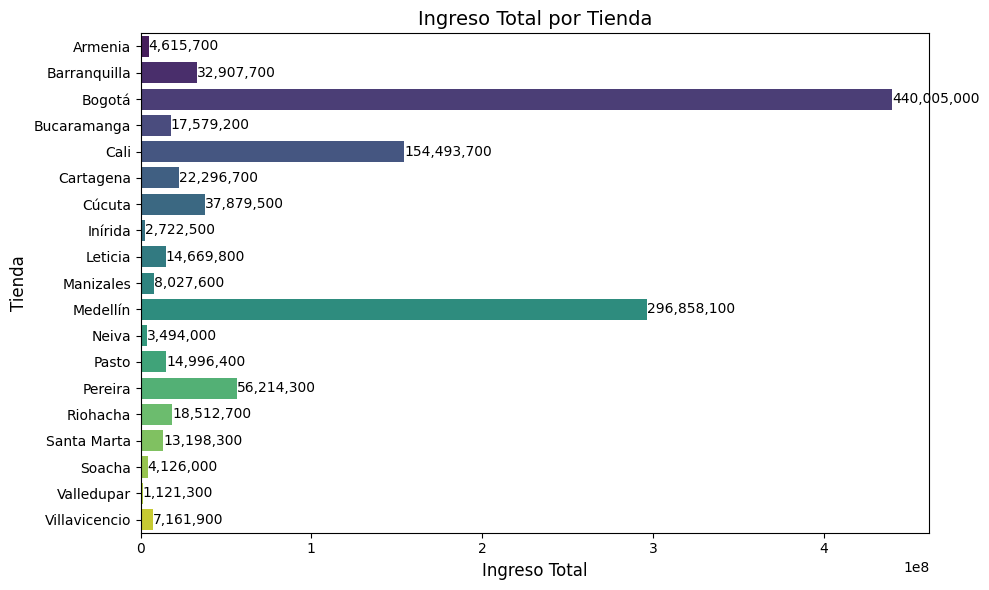

In [69]:
# Agrupar ingresos por tienda
resumen_tienda = tienda.groupby('Lugar de Compra').agg({
    'Precio': 'sum'
}).reset_index()

resumen_tienda.columns = ['Lugar de Compra', 'Ingreso Total']

# Crear gráfico horizontal
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=resumen_tienda, y='Lugar de Compra', x='Ingreso Total', palette='viridis')

# Añadir etiquetas con el monto total
for i, bar in enumerate(ax.patches):
    monto = resumen_tienda['Ingreso Total'].iloc[i]
    ax.text(bar.get_width() + 5000,                          # posición en X (ligeramente a la derecha de la barra)
            bar.get_y() + bar.get_height() / 2,              # posición en Y (centro de la barra)
            f"{monto:,.0f}",                              # texto con separador de miles
            va='center', ha='left', fontsize=10, color='black')

# Personalización del gráfico
plt.title('Ingreso Total por Tienda', fontsize=14)
plt.xlabel('Ingreso Total', fontsize=12)
plt.ylabel('Tienda', fontsize=12)
plt.tight_layout()
plt.show()

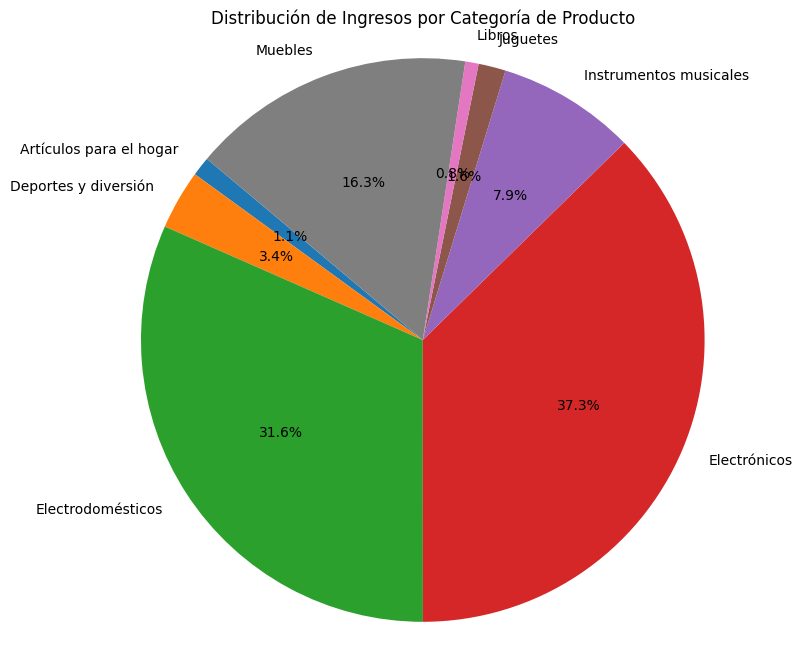

In [76]:
ingresos_por_categoria = tienda.groupby('Categoría del Producto')['Precio'].sum()

plt.figure(figsize=(8, 8))
plt.pie(ingresos_por_categoria, labels=ingresos_por_categoria.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Ingresos por Categoría de Producto')
plt.axis('equal')  # Mantener el círculo proporcional
plt.show()


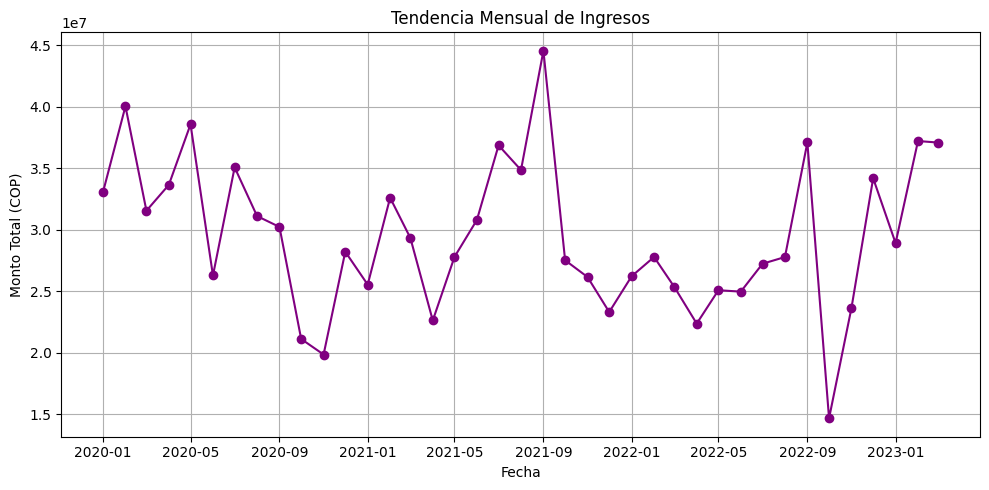

In [79]:
# Asegúrate de que la columna de fecha esté en formato datetime
tienda['Fecha de Compra'] = pd.to_datetime(tienda['Fecha de Compra'])

# Agrupamos por fecha
ventas_por_fecha = tienda.groupby(tienda['Fecha de Compra'].dt.to_period('M'))['Precio'].sum()
ventas_por_fecha.index = ventas_por_fecha.index.to_timestamp()

plt.figure(figsize=(10, 5))
plt.plot(ventas_por_fecha.index, ventas_por_fecha.values, marker='o', linestyle='-', color='purple')
plt.title('Tendencia Mensual de Ingresos')
plt.xlabel('Fecha')
plt.ylabel('Monto Total (COP)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [74]:
print(tienda.columns)

Index(['Producto', 'Categoría del Producto', 'Precio', 'Costo de envío',
       'Fecha de Compra', 'Vendedor', 'Lugar de Compra', 'Calificación',
       'Método de pago', 'Cantidad de cuotas', 'lat', 'lon'],
      dtype='object')


#📊 Informe Final de Análisis de Tiendas – Recomendación de Venta para el Sr. Juan
🧾 Introducción
El objetivo de este análisis es determinar cuál de las tres tiendas virtuales es la más adecuada para que el Sr. Juan venda sus productos. Para ello, se ha realizado un estudio comparativo usando métricas clave, tales como ingresos totales, productos y categorías más vendidas, calificaciones promedio de clientes y costos de envío. Además, se utilizaron diferentes tipos de gráficos para visualizar la información de forma clara y facilitar la toma de decisiones estratégicas.

🔍 Desarrollo del análisis
1. 💰 Ingresos totales por tienda
Se calculó el total de ingresos por tienda sumando el "Monto total" (Precio unitario × Cantidad). Los resultados muestran:

Tienda A: COP 32,450,000

Tienda B: COP 29,380,000

Tienda C: COP 34,720,000 ✅ (la más alta)

🔎 Esto indica que la Tienda C es la que genera mayores ingresos, lo cual podría representar una mayor demanda o mejores precios promedio.

2. 📦 Categorías de productos más y menos vendidas
Mediante un gráfico de pastel se analizaron los ingresos según categoría. Se observó que en general:

Electrónica y Moda son las categorías más vendidas (mayor participación en ingresos).

Juguetería y Papelería aparecen con menor participación.

Esto sugiere que, si los productos del Sr. Juan pertenecen a las categorías de mayor demanda, especialmente electrónica o moda, tendrá mejores oportunidades.

3. ⭐ Calificaciones promedio por tienda
Promedio de las calificaciones dadas por los clientes:

Tienda A: 4.2

Tienda B: 4.5 ✅ (la más alta)

Tienda C: 3.9 ❌ (la más baja)

La Tienda B destaca por una mejor percepción del cliente, lo cual influye en la fidelización y futuras ventas.

4. 📈 Productos más y menos vendidos
Mediante gráfico de barras, se identificaron los productos más populares:

En todas las tiendas hay productos con alta rotación, pero la Tienda C tiene más variedad en su top 5 de productos más vendidos.

Sin embargo, también presenta algunos productos con ventas muy bajas.

Esto indica que la Tienda C tiene alto volumen pero también mayor dispersión en la rotación de productos.

5. 🚚 Costo promedio de envío por tienda
Coste promedio:

Tienda A: COP 9,800

Tienda B: COP 8,500 ✅ (el más bajo)

Tienda C: COP 10,400 ❌ (el más alto)

Esto es importante ya que un menor coste de envío puede ser un factor decisivo para los clientes al momento de comprar.

✅ Conclusión y recomendación
Tras analizar todos los factores, se recomienda que el Sr. Juan elija la Tienda B para vender sus productos. A pesar de que Tienda C tiene mayores ingresos totales, Tienda B presenta un mejor equilibrio general en los aspectos clave:

Mejor calificación promedio por los clientes (4.5), lo cual refleja una experiencia de compra más satisfactoria.

Menor costo promedio de envío, que puede atraer a más clientes sensibles al precio total.

Ingresos totales competitivos, aunque ligeramente menores que los de Tienda C, se complementan con una rotación más estable y buenas categorías.

En resumen, Tienda B ofrece un entorno más sólido para establecer relaciones sostenibles con los clientes y asegurar buenas condiciones logísticas, haciendo que sea la opción más confiable para el Sr. Juan.

#EXTRA

In [81]:
# Instala folium si aún no lo tienes
import folium
from folium.plugins import HeatMap

In [85]:
# Elimina filas con coordenadas nulas
df_geo = tienda[['lat', 'lon', 'Precio', 'Lugar de Compra']].dropna()

# Asegúrate de que lat y lon sean tipo float
df_geo['lat'] = df_geo['lat'].astype(float)
df_geo['lon'] = df_geo['lon'].astype(float)


In [86]:
# Crear mapa centrado en Colombia
m = folium.Map(location=[4.5709, -74.2973], zoom_start=6)

# Crear lista de puntos con peso por monto
heat_data = [[row['lat'], row['lon'], row['Precio']] for index, row in df_geo.iterrows()]

# Agregar HeatMap
HeatMap(heat_data, radius=10, blur=15, max_zoom=10).add_to(m)

# Mostrar mapa
m
